# Purpose of this Session - 
To expose the audience to the basic __descriptive__ and __inferential__ statistical analyses

### Recap of Session 3: 
In the data preparation class last session, we reviewed 
1. __Importance of missing value treatment__, 
2. __Understanding the distribution of data in continuous numerical columns__ [dataframe.describe() - describes all numerical variables]
3. __Understanding the type of data in categorical columns__ [dataframe.groupby(categorical_var)[categorical_var].count()]

### Why Python for Statistics?
* R is a language dedicated to Stats
* Python is a general purpose language with statistical modules. 
* R has a better syntax corpus for Stats
* However, Stats in Python is very useful to building complex analysis with Text Mining/ Image Analysis 

### What are the different forms of data?
1. Quanitative:
    * Continuous
    * Discrete/ Integer
2. Qualitative: 
    * Categorical/ Nominal (if there is no natural order between the categories)
    * Ordinal (if there is order)
    - E.g.: 
        Ordinal variable - Size of a playground (Small, Medium, Large
    Qualitative data can be converted into discrete numeric data by simply counting the different values that appear
    
Key Notes: 
* Quantitative can be continuous or discrete. But all qualitative data is, in a way, discrete. 
* Rule of thumb is that discrete variables can be counted and continuous variables can be measured

###### This first part of the class takes it forward from session 3,
Giving __a structured approach__ to the __Descriptive Statistical__ analysis techniques we perform on continuous and categorical columns
1. Continous Variable Analysis Techniques - (in depth)
2. Categorical Variable Analysis Techniques - (briefly touched)

### What is Statistics?
Statistics deals with summarizing information in a meaningful and useful way.

How would you describe population of Chennai?
1. Overall Population - 8 Crores
2. Population Density, Region-wise distribution, Median Age

All of the above are statistics used to summarize information, __because talking about each data point is impossible__

1. Measures of Center (Central Tendency)
2. Measures of Spread (dispersion)
3. Measures of Shape

###### Continuous Variable Analysis Techniques - 1. Central Tendency (Measures of Center)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import mtcars

In [4]:
%matplotlib inline

__Mean__ is simply an average: the sum of the values divided by the total number of records

In [5]:
mtcars['hp'].mean()

146.6875

__Median__ of a distribution is the value where 50% of the data lies below it and 50% lies above it. 
In essence, the median splits the data in half

In [6]:
mtcars['hp'].median() 

123.0

1. In a __symmetric distribution__, the mean and median will be the same
2. In __skewed distributions__ (such as the one below), 
the __mean tends to get pulled in the direction of the skew and outliers__, while the __median tends to resist the effects of skew and outliers__.
The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

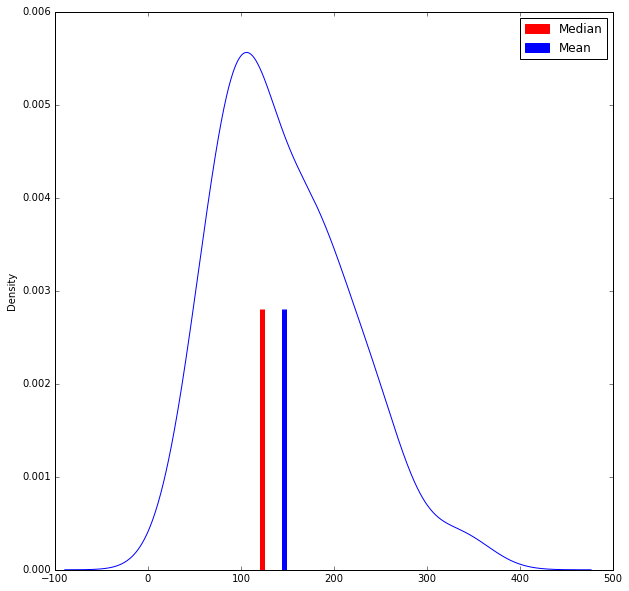

In [7]:
import matplotlib.patches as mpatches

mtcars['hp'].plot(kind="density",figsize=(10,10))
#aka Kernel Density Plots, Density Trace Graph
#A Probability Density Function answers the question: "How common are samples at exactly this value?" 
#A Cumulative Distribution Function answers the question "How common are samples that are less than or equal to this value?" 
#The CDF is the integral of the PDF.
plt.vlines(mtcars['hp'].mean(),     # Plot blue line at mean
           ymin=0, 
           ymax=0.0028,
           linewidth=5.0,color="blue")
plt.vlines(mtcars['hp'].median(),     # Plot red line at median
           ymin=0, 
           ymax=0.0028,
           linewidth=5.0,color="red")
red_line = mpatches.Patch(color='red', label='Median')   
blue_line = mpatches.Patch(color='blue', label='Mean')
plt.legend(handles=[red_line, blue_line])

1. The __mode__ of a variable is simply the value that appears __most frequently__
2. Unlike mean and median, you can take the __mode of a categorical variable__ and 
it is possible to have __multiple modes__.

In [8]:
mtcars['mpg'].mode()
#presence of multiple modes

0    10.4
1    15.2
2    19.2
3    21.0
4    21.4
5    22.8
6    30.4
dtype: float64

In [9]:
mtcars.groupby('mpg')['mpg'].count()
#why multiple modes?

mpg
10.4    2
13.3    1
14.3    1
14.7    1
15.0    1
15.2    2
15.5    1
15.8    1
16.4    1
17.3    1
17.8    1
18.1    1
18.7    1
19.2    2
19.7    1
21.0    2
21.4    2
21.5    1
22.8    2
24.4    1
26.0    1
27.3    1
30.4    2
32.4    1
33.9    1
Name: mpg, dtype: int64

###### Continuous Variable Analysis Techniques - 2. Measures of Spread

__Measures of spread (dispersion)__ are statistics that describe __how data varies__. 
While __measures of center__ give us an idea of the __typical value__, 
__measures of spread__ give us a sense of __how much the data tends to diverge from the typical value__.

Three common Measures of Spread: 
1. Range
2. Five Number Summary or Box Plot
3. Standard Deviation and Variance

In [10]:
#Range
max(mtcars["hp"]) - min(mtcars["hp"])

283

In [11]:
#Five Number Summary or Box Plot
five_num = [mtcars["hp"].quantile(0),   
            mtcars["hp"].quantile(0.25),
            mtcars["hp"].quantile(0.50),
            mtcars["hp"].quantile(0.75),
            mtcars["hp"].quantile(1)]
for each in five_num:
    print round(each,2)

52.0
96.5
123.0
180.0
335.0


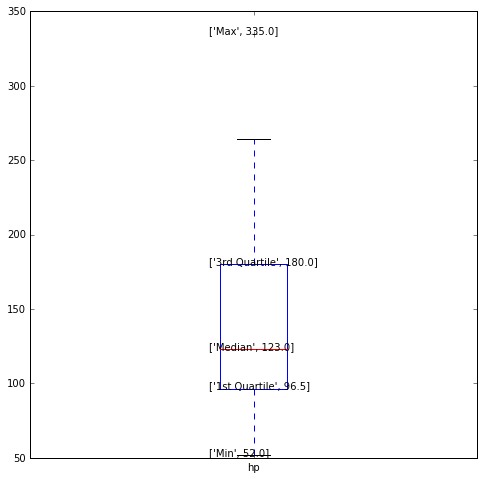

In [12]:
mtcars['hp'].plot(kind='box',figsize=(8,8),return_type='axes')
plt.text(x=0.9, y=mtcars["hp"].quantile(0.75), s=["3rd Quartile",mtcars["hp"].quantile(0.75)])
plt.text(x=0.9, y=mtcars["hp"].quantile(0.50), s=["Median",mtcars["hp"].quantile(0.50)])
plt.text(x=0.9, y=mtcars["hp"].quantile(0.25), s=["1st Quartile",mtcars["hp"].quantile(0.25)])
plt.text(x=0.9, y=mtcars["hp"].quantile(0), s=["Min",mtcars["hp"].quantile(0)])
plt.text(x=0.9, y=mtcars["hp"].quantile(1), s=["Max",mtcars["hp"].quantile(1)])

(-10, 500)

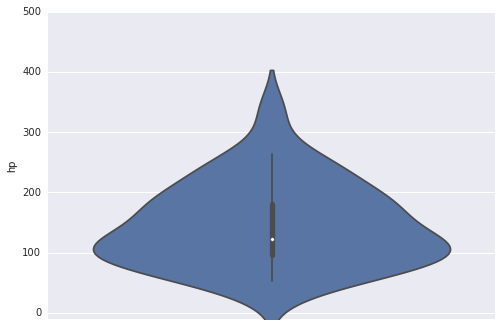

In [13]:
import seaborn as sns
sns.violinplot(y='hp', data=mtcars)
plt.ylim(-10,500)

The __variance__ of a distribution is the __average of the squared deviations (differences) from the mean__

In [14]:
#variance
mtcars["hp"].var()

4700.866935483871

The __standard deviation__ is the square root of the variance. 

In [15]:
#std
mtcars["hp"].std()

68.56286848932059

__Standard deviation__ can be __more interpretable than variance__, 
since the standard deviation is expressed in terms of the same units as the variable in question

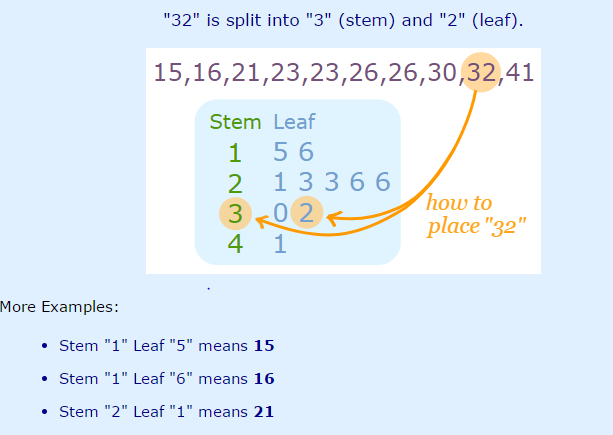

In [19]:
#Stem and Leaf Plot: Slightly different from box plot and vilon plot, but does something similar
from IPython.display import Image
Image(filename=r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Stem and Leaf Plot.PNG")

In [20]:
from collections import namedtuple
from pprint import pprint as pp
from math import floor
 
Stem = namedtuple('Stem', 'data, leafdigits')
 
data0 = Stem((mtcars['hp']),
             1.0)
 
def stemplot(stem):
    d = []
    interval = int(10**int(stem.leafdigits))
    for data in sorted(stem.data):
        data = int(floor(data))
        stm, lf = divmod(data,interval)
        d.append( (int(stm), int(lf)) )
    stems, leafs = list(zip(*d))
    stemwidth = max(len(str(x)) for x in stems)
    leafwidth = max(len(str(x)) for x in leafs)
    laststem, out = min(stems) - 1, []
    for s,l in d:
        while laststem < s:
            laststem += 1
            out.append('\n%*i |' % ( stemwidth, laststem))
        out.append(' %0*i' % (leafwidth, l))
    out.append('\n\nKey:\n Stem multiplier: %i\n X | Y  =>  %i*X+Y\n'
               % (interval, interval))
    return ''.join(out)
 
if __name__ == '__main__':
    print 
    print( stemplot(data0) )




 5 | 2
 6 | 2 5 6 6
 7 |
 8 |
 9 | 1 3 5 7
10 | 5 9
11 | 0 0 0 3
12 | 3 3
13 |
14 |
15 | 0 0
16 |
17 | 5 5 5
18 | 0 0 0
19 |
20 | 5
21 | 5
22 |
23 | 0
24 | 5 5
25 |
26 | 4
27 |
28 |
29 |
30 |
31 |
32 |
33 | 5

Key:
 Stem multiplier: 10
 X | Y  =>  10*X+Y



###### Continuous Variable Analysis Techniques - 3. Measure of Shape - Skewness and Kurtosis

These two give you a sense of the shape of a distribution

__Skewness__ measures the __skew or asymmetry of a distribution__ while 
__kurtosis__ measures the __peakedness__ of a distribution

In [21]:
mtcars["hp"].skew()

0.79940669259563824

In [22]:
mtcars["hp"].kurt()

0.27521158753711239

In [23]:
#More example datasets to understand Skewness and Kurtosis 
#normal distribution
norm_data=np.random.normal(size=100000)
norm_data=pd.Series(norm_data)

#exponential distribution
exponential_data=np.random.exponential(size=65000)
exponential_data=pd.Series(exponential_data)

#skewed distribution
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
skewed_data=pd.Series(skewed_data)

#A distribution with a sharp peak
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)
peaked_data=pd.Series(peaked_data)

#uniformed distribution
uniform_data = np.random.uniform(0,2, size=100000)
uniform_data=pd.Series(uniform_data)

In [24]:
data=pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data,
                       "exponential":exponential_data
                  })

In [25]:
mtcars_disp_title = "Mtcars Hp Distribution with %f Skew and %f kurt" %(mtcars["hp"].skew(),mtcars["hp"].kurt())
norm_data_title= "Normal Distribution with %f Skew and %f kurt" %(data["norm"].skew(),data["norm"].kurt())
skewed_data_title = "Skewed Distribution with %f Skew and %f kurt" %(data["skewed"].skew(),data["skewed"].kurt())
peaked_data_title= "Peaked Distribution with %f Skew and %f kurt" %(data["peaked"].skew(),data["peaked"].kurt())
uniform_data_title= "Uniform Distribution with %f Skew and %f kurt" %(data["uniform"].skew(),data["uniform"].kurt())
exponential_data_title= "Exponential Distribution with %f Skew and %f kurt" %(data["exponential"].skew(),data["exponential"].kurt())

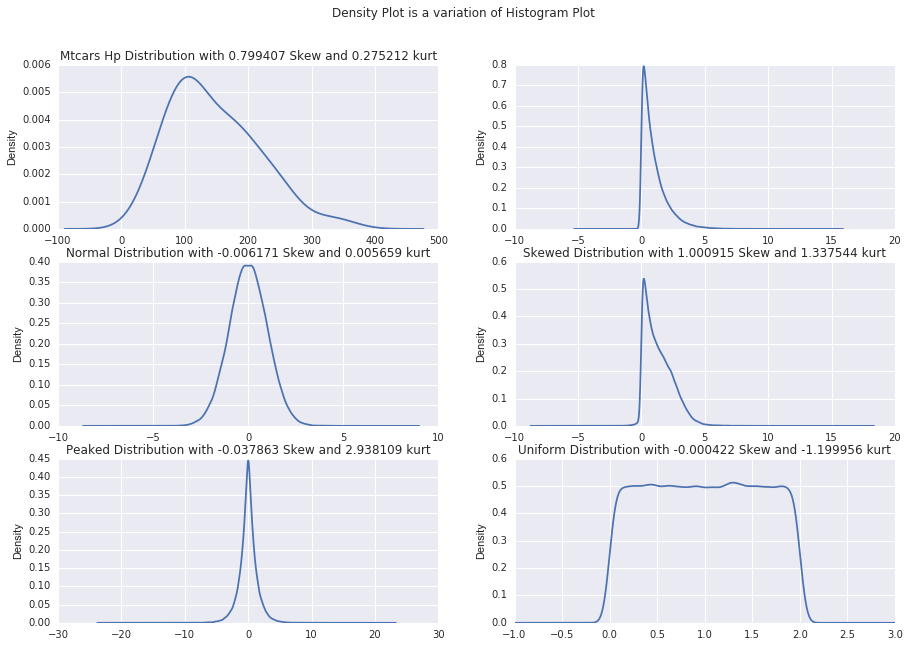

In [26]:
fig,axes=plt.subplots(nrows=3, ncols=2,figsize=(15,10))
mtcars['hp'].plot(kind='density',ax=axes[0,0])
axes[0,0].set_title(mtcars_disp_title)

exponential_data.plot(kind='density',ax=axes[0,1])
axes[1,0].set_title(exponential_data_title)

norm_data.plot(kind='density',ax=axes[1,0])
axes[1,0].set_title(norm_data_title)

skewed_data.plot(kind='density',ax=axes[1,1])
axes[1,1].set_title(skewed_data_title)

peaked_data.plot(kind='density',ax=axes[2,0])
axes[2,0].set_title(peaked_data_title)

uniform_data.plot(kind='density',ax=axes[2,1])
axes[2,1].set_title(uniform_data_title)

plt.suptitle('Density Plot is a variation of Histogram Plot')

In [27]:
print data.skew()
print "\n"
print mtcars['hp'].skew()

exponential    1.990604
norm          -0.006171
peaked        -0.037863
skewed         1.000915
uniform       -0.000422
dtype: float64


0.799406692596


Skew measures __asymmetry__ and hence skewness is __highest in Exponential data and Skewed data__ and all the others have low skewness because they are all fairly symmetrical

In [28]:
print data.kurt()
print "\n"
print mtcars['hp'].kurt()

exponential    5.905871
norm           0.005659
peaked         2.938109
skewed         1.337544
uniform       -1.199956
dtype: float64


0.275211587537


__Peakedness/Kurtosis__ is lowest in the flat, uniformly distributed data, 
second lowest in normally distributed data and 
highest in data with sharper peaks

###### Continuous Variable Analysis Techniques - 4. More explanation on Normal Distribution (an important distribution in Statistics)

__Random variables__ are nothing but the columns of the data set

__random variables__: variables that vary due to chance

A __probability distribution__ describes how a random variable is distributed; it tells us which values a random variable is most likely to take on and which values are less likely

What is a normal distribution?
1. The normal or Gaussian distribution is a __continuous probability distribution__ characterized by __a symmetric bell-shaped curve__. 
2. A normal distribution is defined by its descriptive statistical paramters - __center (mean)__ and __spread (standard deviation.)__ 
3. The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

In [ ]:
#Normality Test - Testing whether distrubution of a variable is normal or not

__Why Normality Test?__
The normal distribution is perhaps the most important distribution in all of statistics. 
It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, 
so it is often used to model random variables. 
__Many common statistical tests assume distributions are normal__.
E.g.: 
When you are doing __a t-test or ANOVA__, the __assumption is that the distribution of the sample means are normally distributed__

Definition of Central Limit Theorem:
even when a population is non-normally distributed, the distribution of the “sample means” will be normally distributed when the sample size is 30 or more

In [ ]:
import scipy.stats  as stats

In [ ]:
#stats module contains a large number of probability distributions and statistical functions
stats.normaltest(norm_data, axis=0)

In [ ]:
stats.normaltest(mtcars['hp'], axis=0)

#Interpretation: 
normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value
Traditionally, in statistics, you need a p-value of less than 0.05 to reject the null hypothesis

Here, with a p-value of 0.08, the mtcars disp column could follow Normal Distribution at 95% confidence interval 

###### Other common Continuous Distributions: 
2. Exponential - an example already seen
3. Uniform - an example already seen

###### Common discrete distributions:
1. Binomial Distribution
2. Geometric Distribution
3. Poisson Distribution

###### Categorical Variable Analysis Tecniques:
1. Bar chart (counts/frequencies), pie chart (--> very familiar techniques for understanding a categorical variable data)
2. Pareto Chart (an example of an unusual chart for categorical variable)

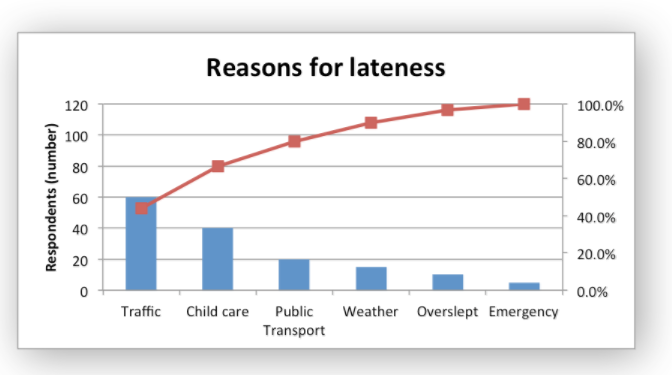

In [29]:
#A Typical Pareto chart for a categorical variable looks like the one below:
Image(filename=r"E:\2017\May\Data Handling Workshop - second installment\Session 4 - Statistical Analysis Learning Material\Learning Material\Pareto chart for categorical variables.PNG")

In [30]:
mtcars['gear'].unique()
List_Gear_Count=mtcars.groupby('gear')['gear'].count().sort_values(ascending=False)
Type_of_Gear_List=List_Gear_Count.index
List_Gear_Count.index=range(len(List_Gear_Count))
df_Gear=pd.DataFrame({'Type of Gear':Type_of_Gear_List,'Number of Cars Sold in each Gear':List_Gear_Count})
df_Gear=pd.DataFrame({'Type of Gear':Type_of_Gear_List,'Number of Cars Sold in each Gear':List_Gear_Count})
df_Gear['%Share']=df_Gear['Number of Cars Sold in each Gear']/sum(df_Gear['Number of Cars Sold in each Gear'])*100
df_Gear['Cumulative Percentage']=0
for each in range(len(df_Gear)):
    i=0
    while i<=each:
        df_Gear.ix[each,'Cumulative Percentage']=df_Gear.ix[each,'Cumulative Percentage']+df_Gear.ix[i,'%Share']
        i=i+1

In [31]:
df_Gear

,Number of Cars Sold in each Gear,Type of Gear,%Share,Cumulative Percentage
0,15,3,46.875,46.875
1,12,4,37.500,84.375
2,5,5,15.625,100.000


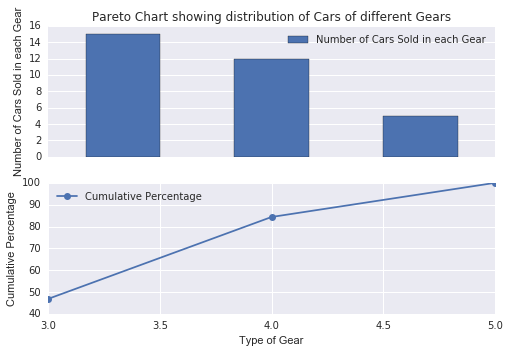

In [32]:
#fig = plt.figure(figsize=(15, 15)) # define plot area
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8,2))
plt.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=None)
df_Gear.plot(kind='bar',x = 'Type of Gear', y = 'Number of Cars Sold in each Gear',ax = axes[0])
axes[0].get_xaxis().set_visible(False)
axes[0].set_title('Pareto Chart showing distribution of Cars of different Gears') # Give the plot a main title
axes[0].xaxis.label.set_visible(False)
axes[0].set_ylabel('Number of Cars Sold in each Gear')# Set text for y axis

df_Gear.plot(x = 'Type of Gear', y = 'Cumulative Percentage',linestyle='-', marker='o',ax = axes[1])
#axes[1].set_title('Average_Price for every make') # Give the plot a main title
#axes[1].set_xlabel('Make') # Set text for the x axis
axes[1].set_ylabel('Cumulative Percentage')# Set text for y axis